# getting started:

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# exploratory data-analysis:

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

l = df.columns

In [7]:
l

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

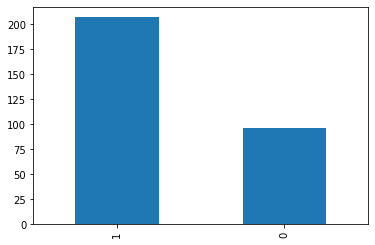

In [8]:
df['sex'].value_counts().plot(kind='bar')

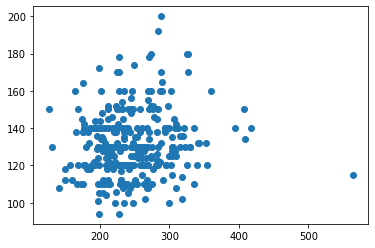

In [9]:
plt.scatter(df['chol'],df['trestbps'])

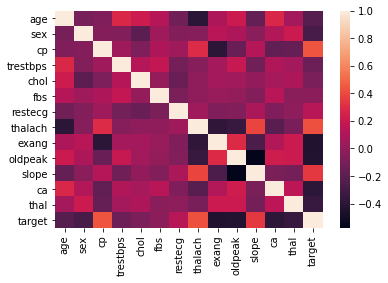

In [10]:
sns.heatmap(df.corr())

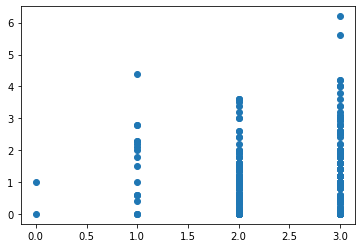

In [11]:
plt.scatter(df['thal'],df['oldpeak'])

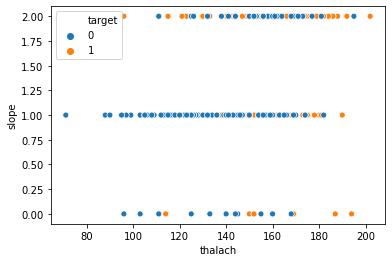

In [12]:
sns.scatterplot(df['thalach'], df['slope'], hue=df['target'])

# modelling the data using classifiers :

In [13]:
X = df[l[:-1]]

y = df[l[-1]]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

scaled_train = scaler.fit_transform(X_train)

scaled_test = scaler.transform(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

**using logistic regression :**

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(scaled_train,y_train)

preds = lr_model.predict(scaled_test)

In [18]:
print(confusion_matrix(y_test,preds))

[[34  8]
 [11 47]]


In [19]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.85      0.81      0.83        58

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



**using PCA to reduced dimensionality of the data-set:**

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(3)

reduced_train = pca.fit_transform(scaled_train)

reduced_test = pca.transform(scaled_test)

In [22]:
reduced_train.shape

(203, 3)

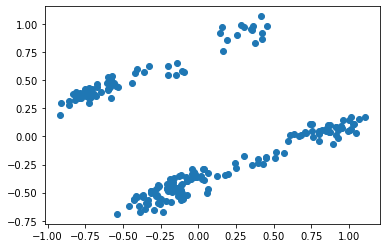

In [23]:
plt.scatter(reduced_train[:,0],reduced_train[:,1])

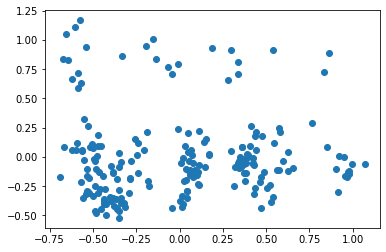

In [24]:
plt.scatter(reduced_train[:,1],reduced_train[:,2])

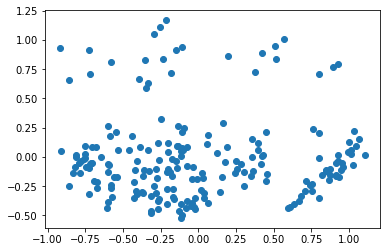

In [25]:
plt.scatter(reduced_train[:,0],reduced_train[:,2])

**using logistic regression with PCA:**

In [26]:
lr_model = LogisticRegression()

lr_model.fit(reduced_train,y_train)

preds = lr_model.predict(reduced_test)

In [27]:
print(confusion_matrix(y_test,preds))

[[33  9]
 [11 47]]


In [28]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [29]:
from sklearn.metrics import accuracy_score
iv = []
av = []
for i in range(1,13):
    pca = PCA(i)

    reduced_train = pca.fit_transform(scaled_train)

    reduced_test = pca.transform(scaled_test)
    
    lr_model = LogisticRegression()

    lr_model.fit(reduced_train,y_train)

    preds = lr_model.predict(reduced_test)
    
    iv.append(i)
    av.append(accuracy_score(y_test,preds))

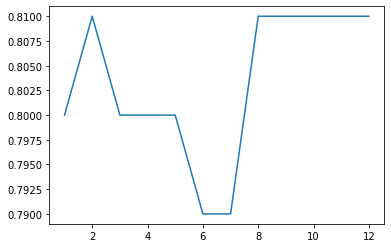

In [30]:
plt.plot(iv,av)

**using SVMs with PCA:**

In [31]:
from sklearn.svm import SVC

In [32]:
iv = []
av = []
for i in range(1,13):
    pca = PCA(i)

    reduced_train = pca.fit_transform(scaled_train)

    reduced_test = pca.transform(scaled_test)
    
    svc = SVC()

    svc.fit(reduced_train,y_train)

    preds = svc.predict(reduced_test)
    
    iv.append(i)
    av.append(accuracy_score(y_test,preds))

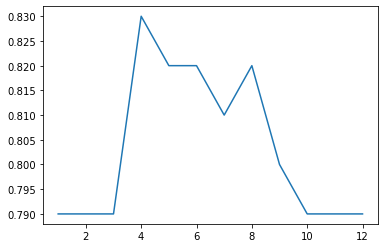

In [33]:
plt.plot(iv,av)

In [34]:
pca = PCA(4)

reduced_train = pca.fit_transform(scaled_train)

reduced_test = pca.transform(scaled_test)
    
svc = SVC()

svc.fit(reduced_train,y_train)

preds = svc.predict(reduced_test)

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        42
           1       0.89      0.81      0.85        58

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



**using SVMs without PCA:**

In [36]:
svc = SVC()

svc.fit(scaled_train,y_train)

preds = svc.predict(scaled_test)

In [37]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        42
           1       0.85      0.79      0.82        58

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [38]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)

x_poly_train = poly.fit_transform(scaled_train)

x_poly_test = poly.transform(scaled_test)

In [39]:
svc = SVC()

svc.fit(x_poly_train,y_train)

preds = svc.predict(x_poly_test)

In [40]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.85      0.81      0.83        58

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [41]:
iv = []
av = []
for i in range(1,106):
    pca = PCA(i)

    reduced_train = pca.fit_transform(x_poly_train)

    reduced_test = pca.transform(x_poly_test)
    
    svc = SVC()

    svc.fit(reduced_train,y_train)

    preds = svc.predict(reduced_test)
    
    iv.append(i)
    av.append(accuracy_score(y_test,preds))

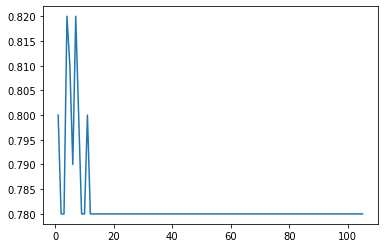

In [42]:
plt.plot(iv,av)

In [43]:
iv = np.array(iv)
av = np.array(av)

iv[av.argmax()]

4

In [44]:
pca = PCA(8)

reduced_train = pca.fit_transform(x_poly_train)

reduced_test = pca.transform(x_poly_test)
    
svc = SVC()

svc.fit(reduced_train,y_train)

preds = svc.predict(reduced_test)

In [45]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.87      0.78      0.82        58

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

